# **Live Code 1**

##**Identity**

Ihsan Aulia Rahman

Full Time Data Science

HCK-Batch-001

#**I. Problems**

##**Problem 1**

Salah satu ruang lingkup Natural Language Processing (NLP) adalah mengukur kesamaan konteks antar kalimat. Untuk mengetahui dua kalimat memiliki konteks yang sama atau tidak, kita mengukurnya dengan cosine similarity. Cosine similarity sejatinya mengukur 'jarak' antar dua vektor yang mana vektor-vektor tersebut berisikan angka-angka, sehingga kita perlu menerjemahkan kalimat menjadi list angka (encoding). Ada banyak metode encoding yang dapat digunakan untuk menerjemahkan kalimat ke angka, salah satunya adalah dengan menghitung frekuensi kemunculan kata pada setiap kalimat.

Kalimat 1: Julie loves me more than Linda loves me

Kalimat 2: Jane likes me more than Julie loves me

1. Apakah kedua kalimat memiliki konteks yang serupa? jika iya, mengapa dan jika tidak, mengapa (jawab berdasarkan hasil perhitungan cosine similaritynya)?
2. Jika meninjau dua buah vektor dan dihitung cosine similaritynya (cos theta), jelaskan secara singkat, jelas, padat apa makna cosine similarity yang bernilai 0 dan 1 (tinjau dari posisi dua vektor di koordinat kartesian)?
3. Apa kekurangan dari perhitungan kemiripan menggunakan cosine similarity?

##**Problem 2**

1. Berapa rata-rata, median, dan modus dari data tersebut sebelum dihilangkan outliernya? Bagaimana kecerendungan pemusatan datanya? jelaskan jawabanmu!
2. Sebelum melakukan extreme value analysis, kamu harus melakukan pengecekan skewness dari distribusi datanya. Apakah datanya skew atau normal? jelaskan jawabanmu!
3. Ada dua teknik untuk melakukan extreme value analysis, teknik yang mana yang kamu pakai? berikan alasanmu berdasarkan data!

#**II. Library**

In [66]:
import numpy as np
from numpy.linalg import inv, det, eig
from numpy import diag

import sympy as sy
from sympy.tensor.array import derive_by_array

import pandas as pd
import matplotlib.pyplot as plt

from pylab import *

import scipy
import scipy.stats as stats

def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

#**III. Answers**

##**Problem 1**

###Computing cos theta

In [44]:
S1 = np.array([2,0,1,1,0,2,1,1])
S2 = np.array([2,1,1,0,1,1,1,1])

cos_theta = S1@S2 / ((np.linalg.norm(S1)) * (np.linalg.norm(S2)))
print('cos theta = ', cos_theta)
# theta = np.arccos(cos_theta)
# print('theta = ', theta)
# similarity = theta/1.5708
# print('similarity = ', similarity)

cos theta =  0.968962790249909


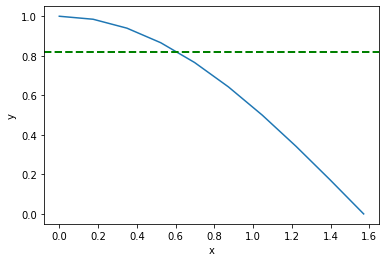

In [24]:
x = np.linspace(0,1.5708,10)
y = np.cos(x)

plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.axhline(cos_theta, color='green', linestyle='dashed', linewidth=2)
#plt.axvline(theta, color='green', linestyle='dashed', linewidth=2)
plt.show()

###Meaning of cos_theta

red: vector 1 
green: vector 2 
blue: vector 3 
black: vector 4


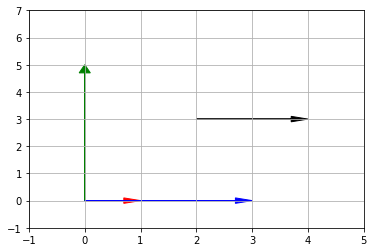

cos theta 1 and 2 =  0.0
cos theta 1 and 3 =  1.0
cos theta 1 and 4 =  1.0


In [43]:
v1 = np.array([1,0])
v2 = np.array([0,5])
v3 = np.array([3,0])
v4 = np.array([2,0])

plot_vector2d(v1, color='r')
plot_vector2d(v2, color='g')
plot_vector2d(v3, color='b')
plot_vector2d(v4, origin = [2,3], color='k')

print('red: vector 1 \ngreen: vector 2 \nblue: vector 3 \nblack: vector 4')
plt.axis([-1, 5, -1, 7])
plt.grid()
plt.show()

cos_theta_12 = v1@v2 / ((np.linalg.norm(v1)) * (np.linalg.norm(v2)))
cos_theta_13 = v1@v3 / ((np.linalg.norm(v1)) * (np.linalg.norm(v3)))
cos_theta_14 = v1@v4 / ((np.linalg.norm(v1)) * (np.linalg.norm(v4)))
print('cos theta 1 and 2 = ', cos_theta_12)
print('cos theta 1 and 3 = ', cos_theta_13)
print('cos theta 1 and 4 = ', cos_theta_14)

As we can see, vector 1 and 3 and have 100% cosine similarity though they are not the exact same vector

###Final answer

1. The two sentences have 82% cosine similarity. They are structurally quite similar but probably different in context. 
2. 0% cosine similarity means the two sentence have no words in common at all. 100% (or 1) cosine similarity means both sentences have the same words, though not necessarily in same order nor same amounts of them. 
3. From our previous assessment, we can see that cosine similarity actually measure the similarity in directions of vectors analogue of sentences, not the similarity of the sentences itself. This method cannot detect if the words are jumbled or if every words are repeated by the same multiple. Using cosine similarity, the sentence `cat eats mouse` is the same as `eats mouse cat` or `eats cat eats mouse mouse cat` which is not exactly same or similar.

##**Problem 2**

###Importing query from BigQuery

In [ ]:
'''
select sale_dollars
from bigquery-public-data.iowa_liquor_sales.sales
limit 5000;
'''

In [103]:
df = pd.read_csv('https://raw.githubusercontent.com/IARahman/Iowa-Liquor-Sale/main/bq-results-20220822-032332-1661138634570.csv')

###Head and tail of data

In [104]:
df

,sale_dollars
0,281.34
1,814.20
2,150.00
3,486.00
4,3596.40
...,...
4995,31.86
4996,50.36
4997,91.44
4998,4177.92


In [105]:
df.agg(('min','max'))

,sale_dollars
min,0.00
max,37514.88


###Visualizing central tendency

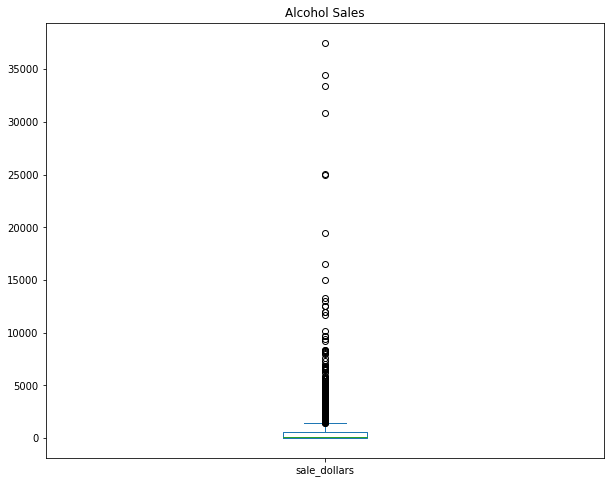

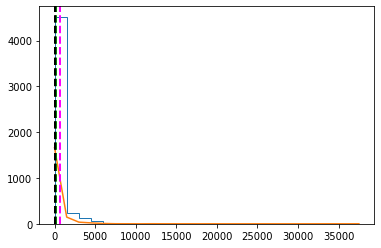

mean: 619.282568
median: 126.0
mode: 45.72
skewness: 10.661331694772882
kurtosis: 180.160019813158


In [106]:
sales = df['sale_dollars']
sales.plot(kind='box', title='Alcohol Sales', figsize=(10,8))
plt.show()

density = stats.gaussian_kde(sales)
n, x, _ = plt.hist(sales, histtype='step', bins=25)  
plt.plot(x, density(x)*5**9)
plt.axvline(sales.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(sales.median(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(sales.mode()[0], color='black', linestyle='dashed', linewidth=2)
plt.show()
print('mean: ' + str(sales.mean()))
print('median: ' + str(sales.median()))
print('mode: ' + str(sales.mode()[0]))
print('skewness: ' + str(sales.skew()))
print('kurtosis: ' + str(sales.kurt()))

For a skewness above 3, the data is very right-skewed 

###Trimming the data

In [115]:
sdf = df.copy()
lowq = sdf['sale_dollars'].quantile([0.25])
upq = sdf['sale_dollars'].quantile([0.75])
sdf.drop(sdf[sdf['sale_dollars'] > upq].index, inplace = True)
sdf.drop(sdf[sdf['sale_dollars'] < lowq].index, inplace = True)
sdf

ValueError: ignored

###Visualizing central tendency of trimmed data

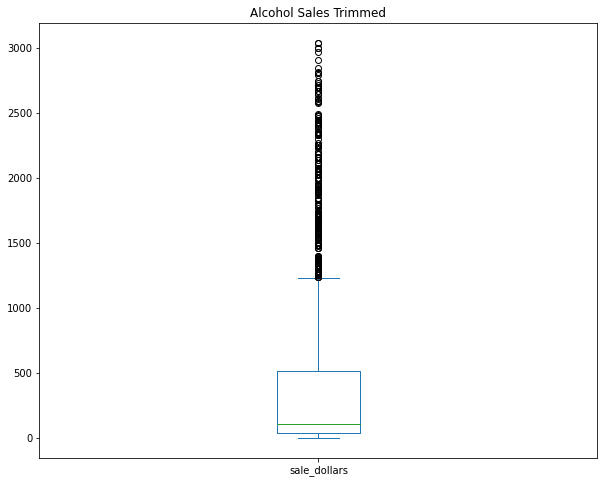

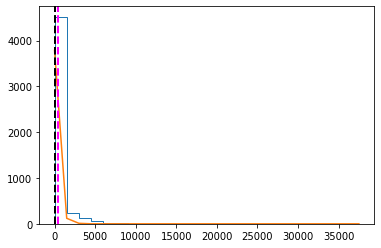

mean: 364.60205542725174
median: 107.96
mode: 45.72
skewness: 2.2417335331538144
kurtosis: 5.431736470651921


In [111]:
ssales = sdf['sale_dollars']
ssales.plot(kind='box', title='Alcohol Sales Trimmed', figsize=(10,8))
plt.show()

density = stats.gaussian_kde(ssales)
n, x, _ = plt.hist(sales, histtype='step', bins=25)  
plt.plot(x, density(x)*5**9)
plt.axvline(ssales.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(ssales.median(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(ssales.mode()[0], color='black', linestyle='dashed', linewidth=2)
plt.show()
print('mean: ' + str(ssales.mean()))
print('median: ' + str(ssales.median()))
print('mode: ' + str(ssales.mode()[0]))
print('skewness: ' + str(ssales.skew()))
print('kurtosis: ' + str(ssales.kurt()))

###Final answers

1. Berapa rata-rata, median, dan modus dari data tersebut sebelum dihilangkan outliernya? Bagaimana kecerendungan pemusatan datanya? jelaskan jawabanmu!
1. Mean: 619.282568, median: 126.0, mode: 45.72. Mean, median and mode are not centered closely. Mean is almost 3 times the median which means some unusually high value data is raising the mean far from the median and mode.
2. Sebelum melakukan extreme value analysis, kamu harus melakukan pengecekan skewness dari distribusi datanya. Apakah datanya skew atau normal? jelaskan jawabanmu!
2. Skewness: 10.661331694772882,kurtosis: 180.160019813158. Data is very skewed to the right (skewness > 3) because of a large tailing (kurtosis > 10) which means the mean is raised because of unusually high value data.
3. Ada dua teknik untuk melakukan extreme value analysis, teknik yang mana yang kamu pakai? berikan alasanmu berdasarkan data!
3. The first is Tukey's Rule. It defines outlier as data that lies above and below 3 times the interquartile range from the median. The other is Z-Value. It defines outlier as data having Z-value below or above 3. I used Tukey because it's more accurate.